In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import UnivariateSpline
from matplotlib.widgets import Slider 


%matplotlib ipympl


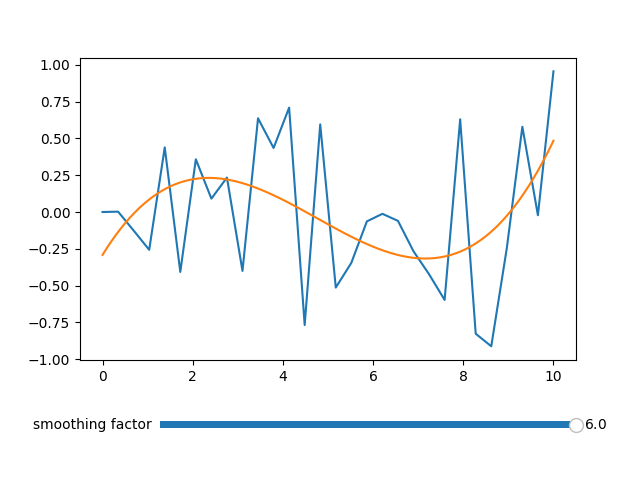

In [4]:
# * creating X and Y data
x = np.linspace(0, 10, 30)
y = np.sin(0.5*x)*np.sin(x*np.random.randn(30))

# * spline interpolation
spline = UnivariateSpline(x, y, s=6)
x_spline = np.linspace(0, 10, 1000)
y_spline = spline(x_spline)

# * ploting
fig = plt.figure()
ax = fig.subplots()
p1 = ax.plot(x, y, '-')
p2,= ax.plot(x_spline, y_spline, '-')


# * adding space to the bottom
plt.subplots_adjust(bottom=0.25)

# * creating slider
# * [left, bottom, width, height]
ax_slider = plt.axes([0.25, 0.1, 0.65, 0.03])
s_factor = Slider(ax_slider, label='smoothing factor',
                  valmin=0.1, valmax=6, valinit=6, valstep=0.2)

# * updateing the plot


def update(val):
    curr = s_factor.val
    spline = UnivariateSpline(x, y, s=curr)
    p2.set_ydata(spline(x_spline))
    fig.canvas.draw()  # *redraw the canvas


# * connecting the slider to the update function
s_factor.on_changed(update)


plt.show()
